In [33]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv('summary.csv')
df = df.sort_values(by='partition')

In [43]:
baseline = df.iloc[0]
print(baseline)

status                ok
partition              1
bram_used            769
dsp_used               3
lutmem_used          141
uram_used              0
reg_used            2719
lut_used            2285
runtime_avg      750.664
runtime_std    0.0269474
Name: 8, dtype: object


In [44]:
info_keys = [ 
    'partition',
]
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

In [45]:
normalized_df = df.copy()
for key in keys:
    norm_val = baseline[key]
    normalized_df[key] = normalized_df[key].apply(lambda v: v / norm_val)
normalized_df = normalized_df[info_keys + keys]
print(normalized_df)

   partition  lut_used  lutmem_used  bram_used  dsp_used  reg_used  \
8          1  1.000000     1.000000   1.000000       1.0  1.000000   
2          2  0.959300     0.907801   1.000000       1.0  0.976094   
9          3  1.330416     1.340426   1.124837       2.0  1.291284   
4          4  0.946171     0.907801   1.000000       1.0  0.976094   
6          5  1.331729     1.312057   1.249675       2.0  1.289445   
0          6  1.533479     1.312057   1.499350       2.0  1.291284   
7          7  1.846827     1.312057   1.749025       2.0  1.302317   
1          8  0.942670     0.914894   1.000000       1.0  0.954763   
5          9  1.375930     1.319149   1.119636       2.0  1.268481   
3         10  1.410503     1.319149   1.240572       2.0  1.270688   

   runtime_avg  
8     1.000000  
2     1.014877  
9     1.228436  
4     1.260546  
6     1.225713  
0     1.225720  
7     1.225699  
1     1.139818  
5     0.999978  
3     1.227811  


In [46]:
long = pd.melt(normalized_df, id_vars=['partition'], var_name='metrics', value_name='values')
long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
partition    60 non-null int64
metrics      60 non-null object
values       60 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


Text(0.5, 0, 'Partitioning Factor')

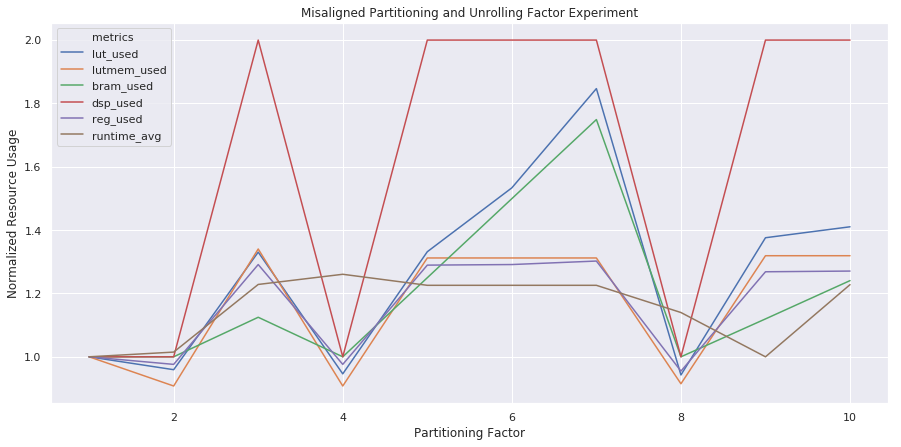

In [47]:
plt.figure(figsize=(15, 7))
plot = sns.lineplot(x='partition', y='values', hue='metrics', data=long)
plot.set_title('Misaligned Partitioning and Unrolling Factor Experiment')
plot.set_ylabel('Normalized Resource Usage')
plot.set_xlabel('Partitioning Factor')

In [40]:
plot.figure.savefig('normalized_resources.png', dpi=300)

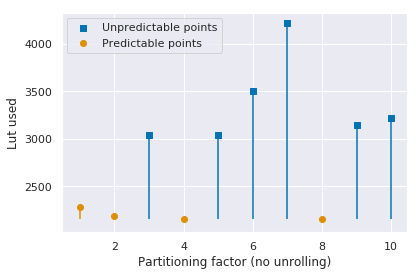

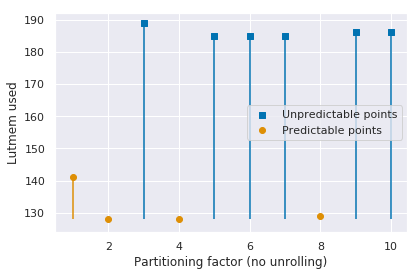

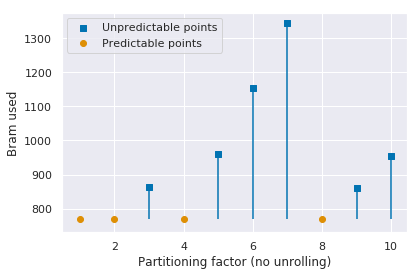

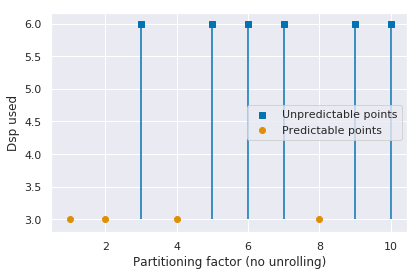

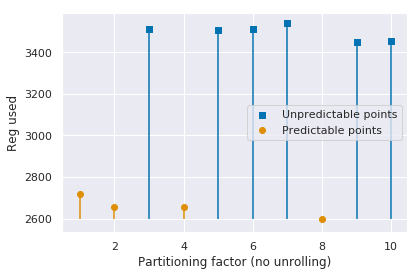

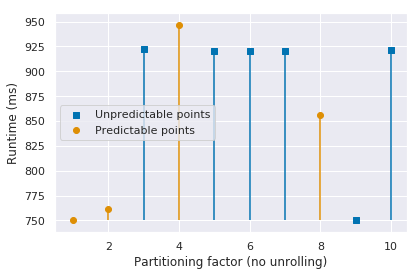

In [48]:
sns.set()

# Configuration for subplot
pal = sns.color_palette('colorblind', 8)

for idx, key in enumerate(keys):
    fig = plt.figure()
    
    normal = df[128 % df.partition != 0]
    dahlia = df[128 % df.partition == 0]
    
    plt.scatter(x='partition', y=key, data=normal, color=pal[0], label='Unpredictable points', marker='s')
    plt.vlines(x='partition', ymax=key, ymin=df[key].min(), data=normal, colors=pal[0])
    
    plt.scatter(x='partition', y=key, data=dahlia, color=pal[1], label='Predictable points')
    plt.vlines(x='partition', ymax=key, ymin=df[key].min(), data=dahlia, colors=pal[1])
   
    
    if key == 'runtime_avg':
        label = 'Runtime (ms)'
    else:
        label = key.replace('_', ' ').capitalize()
    plt.ylabel(label)
    plt.xlabel('Partitioning factor (no unrolling)')
    
    plt.legend()
    
    fig.tight_layout()
    fig.savefig('misaligned-partition-absolute-{}.pdf'.format(key.replace('_', '-')), dpi=100)